In [1]:
'''
from copy import deepcopy
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd


file = 'ALL0050'
skip_header = 20
max_rows = None
wave = 1

if max_rows == None:
    data = np.genfromtxt(f'{file}.csv', delimiter=',', skip_header = skip_header)
else:
    data = np.genfromtxt(f'{file}.csv', delimiter=',', skip_header = skip_header, max_rows=max_rows)

if wave==1:
    x1 = data[ :,0]
    x1 = x1 + x1[0]*np.sign(x1[0])
    y1 = (data[ :,1]/np.max(data[ :,1]))
else:
    x1 = data[ :,2]
    x1 = x1 + x1[0]*np.sign(x1[0])
    y1 = (data[ :,3]/np.max(data[ :,3]))


def func(x, w1, w2, A, B, y0, xc):
    return A*np.cos(w1(x - xc)) + B*np.cos(w2*(x - xc)) + y0

popt, pcov = curve_fit(func, x1, y1, p0=(102.14838391870018, 95.22557029245887, 0.4340843259148129, 0.6039294390977322, -0.045321200248573015, 0.0036412520120957166), bounds=([-np.inf, -np.inf, 0, 0, -np.inf, -np.inf],[np.inf, np.inf, np.inf, np.inf, np.inf,np.inf]))

w1 = popt[0]
w2 = popt[1]
A = popt[2]
B = popt[3]
y0 = popt[4]
xc = popt[5]

# w1 = 106.75726372524723
# w2 = 97.90203960668079
# A = 0.5457510426812962
# B = 0.37429161201505434
# y0 = 0.02870282747823502
# xc = -1.1

Detuning = (w1-w2)*(abs(B)-abs(A))/(abs(B)+abs(A))
Rabi_Freq = (w1-w2)*((1-((abs(B)-abs(A))/(abs(B)+abs(A)))**2)*0.5)
Wg = (w1+w2-((w1-w2)*(abs(B)-abs(A))/(abs(B)+abs(A))))/2


print("Parameter estimation results:")
print("w1 = ",w1," | w2 = ",w2, " | A = ",A," | B = ",B," | y0 =", y0," | xc =", xc)
print("Detuning = ", Detuning, " | Rabi_Freq = ", Rabi_Freq , " | Wg = ", Wg)
# print("--------------------------")
# print("Covariance matrix of the estimate:")
# print(pcov)

curvex=np.linspace(x1[0],x1[-1],len(x1))
curvey=func(curvex,w1,w2,A,B,y0,xc)
plt.plot(x1,y1,'*')
plt.plot(curvex,curvey,'r')
plt.xlabel('time (s)')
plt.ylabel(f'Normalised y of wave {wave}')
plt.savefig(f"{file}_{wave}.png",dpi=300)
plt.show()

# f = open(f'{file}.txt', "w")
# f.write("Parameter estimation results:\n")
# f.write(f" w1 = {w1} \n w2 = {w2} \n A = {A} \n B = {B} \n C =  {y0} \n D = {xc} \n")
# f.write(f"\n Detuning = {Detuning} \n Rabi_Freq = {Rabi_Freq} \n Wg = {Wg} \n")
# f.write("\n--------------------------\n")
# f.write("Covariance matrix of the estimate:\n")
# f.write(f'{pcov}')
# f.close()


append_data = pd.DataFrame([{'File_Name':f'{file}_{wave}', 'w1':w1, 'w2':w2, 'A':A, 'B':B, 'y0':y0, 'xc':xc, 'Detunning':Detuning, 'Rabi_Freq': Rabi_Freq, 'Wg':Wg }])
filename = 'Fit.csv'
df_new = pd.read_csv(filename)
if f'{file}_{wave}' not in df_new['File_Name'].unique():
    append_data.to_csv(filename, mode='a', index = False, header=False)
else:
    index = df_new[df_new['File_Name']==f'{file}_{wave}'].index.values
    df_new = df_new.drop(index[0])
    df_new.to_csv(filename, mode='w+', index = False)
    append_data.to_csv(filename, mode='a', index = False, header=False)
GFG = pd.ExcelWriter('Fit.xlsx')
df_new.to_excel(GFG, index=False) 
GFG.save()


non_y = []
non_x = []
i = 11
while i < (len(x1) - 50):
    cond = True
    for j in range(50):
        if abs(y1[i - j - 1]) > abs(y1[i]) or abs(y1[i]) < abs(y1[i + j + 1]):
            cond = False
        if cond:
            non_y.append(y1[i]**2)
            non_x.append(x1[i])
        i += 1

def func1(x, w, xc):
    return (np.sin(w*(x-xc)))**2

p1, p2 = curve_fit(func1, non_x, non_y, p0=(6, 0))

print(p1[0], p1[1])

curvex=np.linspace(x1[0],x1[-1],len(x1))
curvey=func1(curvex,p1[0],p1[1])
plt.plot(curvex,curvey,'r')
plt.plot(non_x,non_y,'*')
plt.xlabel('time (s)')
plt.ylabel(f'Square of Normalised Amplitude of wave {wave}')
plt.show()
'''

'\nfrom copy import deepcopy\nimport matplotlib.pyplot as plt\nfrom scipy.optimize import curve_fit\nimport numpy as np\nimport pandas as pd\n\n\nfile = \'ALL0050\'\nskip_header = 20\nmax_rows = None\nwave = 1\n\nif max_rows == None:\n    data = np.genfromtxt(f\'{file}.csv\', delimiter=\',\', skip_header = skip_header)\nelse:\n    data = np.genfromtxt(f\'{file}.csv\', delimiter=\',\', skip_header = skip_header, max_rows=max_rows)\n\nif wave==1:\n    x1 = data[ :,0]\n    x1 = x1 + x1[0]*np.sign(x1[0])\n    y1 = (data[ :,1]/np.max(data[ :,1]))\nelse:\n    x1 = data[ :,2]\n    x1 = x1 + x1[0]*np.sign(x1[0])\n    y1 = (data[ :,3]/np.max(data[ :,3]))\n\n\ndef func(x, w1, w2, A, B, y0, xc):\n    return A*np.cos(w1(x - xc)) + B*np.cos(w2*(x - xc)) + y0\n\npopt, pcov = curve_fit(func, x1, y1, p0=(102.14838391870018, 95.22557029245887, 0.4340843259148129, 0.6039294390977322, -0.045321200248573015, 0.0036412520120957166), bounds=([-np.inf, -np.inf, 0, 0, -np.inf, -np.inf],[np.inf, np.inf, np.inf

# CO fitting

[-0.44736842 -0.47368421 -0.42105263 ... -0.73684211 -0.78947368
 -0.73684211]
[7.80370284e+01 6.86821572e+01 1.51622461e-01 8.76227409e-02
 3.89800669e-02 1.92551358e-02]
Parameter estimation results:
w1 =  78.0370283704142  | w2 =  68.68215721895606  | A =  0.15162246063296292  | B =  0.08762274089120324  | y0 = 0.038980066873694534  | xc = 0.01925513581070636
Detuning =  -2.5024917034882224  | Rabi_Freq =  9.013941953127743  | Wg =  74.61083864642926
--------------------------
Covariance matrix of the estimate:
[[ 1.80293382e-02  1.32527199e-02  9.83740535e-05 -1.53376095e-04
  -1.41202883e-06  1.95788012e-04]
 [ 1.32527199e-02  2.67840895e-02  1.28610662e-04 -1.34674631e-04
   1.61693380e-05  1.82486041e-04]
 [ 9.83740535e-05  1.28610662e-04  1.37961044e-04  5.44636248e-06
  -1.84153244e-06  1.40623931e-06]
 [-1.53376095e-04 -1.34674631e-04  5.44636248e-06  1.39242847e-04
  -1.65017325e-06 -2.10125956e-06]
 [-1.41202883e-06  1.61693380e-05 -1.84153244e-06 -1.65017325e-06
   6.86450

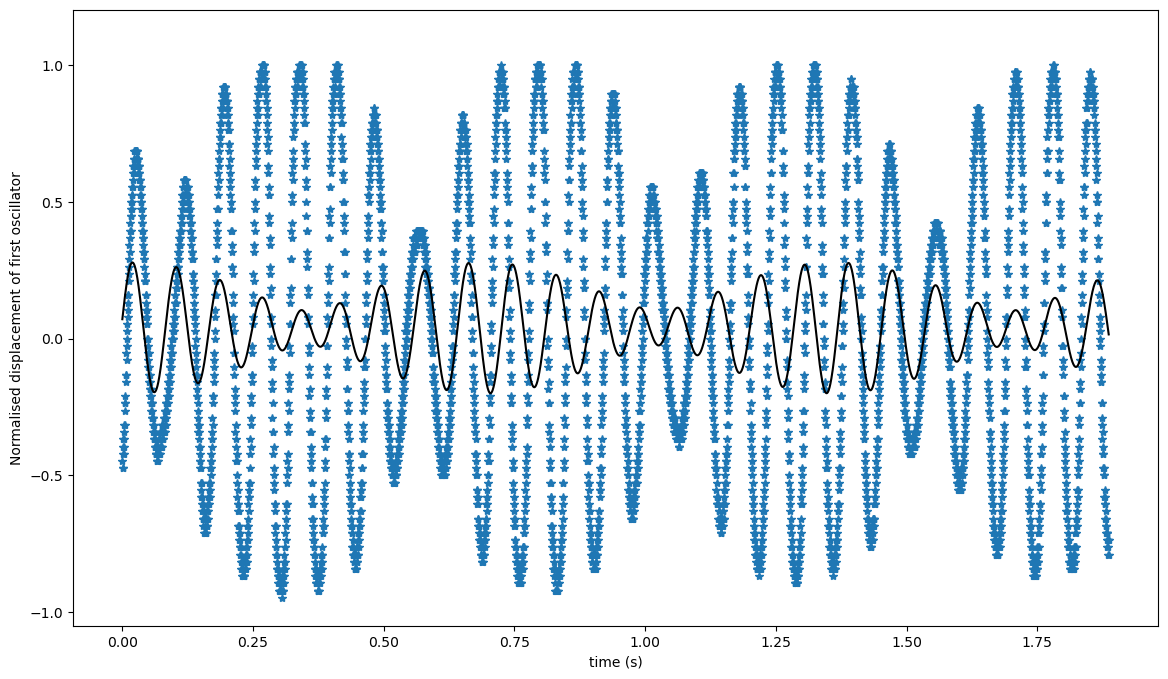

6.398591023941393 0.055180567809204634


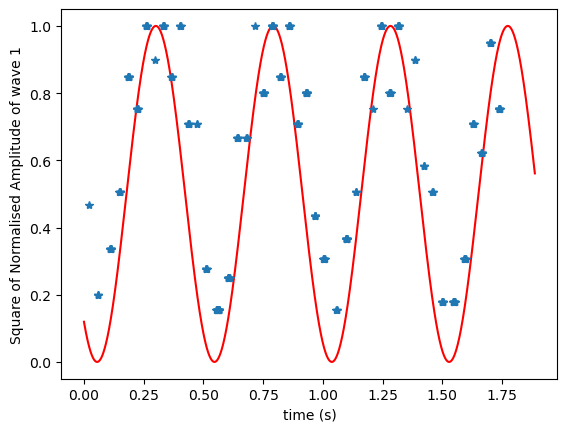

In [20]:
from copy import deepcopy
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd


file = '/home/ws10/maitrey/p442-integrated-lab/IV. Coupled Oscillator/DKMM/ALL0050.CSV'
skip_header = 300
max_rows = None
wave = 1

if max_rows == None:
    data = np.genfromtxt(file, delimiter=',', skip_header = skip_header)
else:
    data = np.genfromtxt(f'{file}.csv', delimiter=',', skip_header = skip_header, max_rows=max_rows)
# print(data)
if wave==1:
    x1 = data[ :,0]
    x1 = x1 + x1[0]*np.sign(x1[0])
    y1 = (data[ :,1]/np.max(data[ :,1]))
    
    
else:
    x1 = data[ :,2]
    x1 = x1 + x1[0]*np.sign(x1[0])
    y1 = (data[ :,3]/np.max(data[ :,3]))

# print(y1.size)
def func(x, w1, w2, A, B, y0, xc):
    return A *np.cos(w1*(x - xc)) + B*np.cos(w2*(x - xc)) + y0
print(y1)
popt, pcov = curve_fit(func, x1, y1, p0=(78, 68, 0.5, -0.34552504757168173, -0.1585394532590704, 0.011490567445622747), bounds=([-np.inf, -np.inf, -np.inf, -np.inf, -np.inf, -np.inf],[np.inf, np.inf, np.inf, np.inf, np.inf,np.inf]))
print(popt)

w1 = popt[0]
w2 = popt[1]
A = popt[2]
B = popt[3]
y0 = popt[4]
xc = popt[5]

# w1 = 106.75726372524723
# w2 = 97.90203960668079
# A = 0.5457510426812962
# B = 0.37429161201505434
# y0 = 0.02870282747823502
# xc = -1.1

Detuning = (w1-w2)*(abs(B)-abs(A))/(abs(B)+abs(A))
Rabi_Freq = (w1-w2)*((1-((abs(B)-abs(A))/(abs(B)+abs(A)))**2)**0.5)
Wg = (w1+w2-((w1-w2)*(abs(B)-abs(A))/(abs(B)+abs(A))))/2


print("Parameter estimation results:")
print("w1 = ",w1," | w2 = ",w2, " | A = ",A," | B = ",B," | y0 =", y0," | xc =", xc)
print("Detuning = ", Detuning, " | Rabi_Freq = ", Rabi_Freq , " | Wg = ", Wg)
print("--------------------------")
print("Covariance matrix of the estimate:")
print(pcov)

curvex=np.linspace(x1[0],x1[-1],len(x1))
curvey=func(curvex,w1,w2,A,B,y0,xc)
plt.figure(figsize=(14,8))    
plt.plot(x1,y1,'*')
plt.plot(curvex,curvey,'black', 1.1)
plt.xlabel('time (s)')
plt.ylabel(f'Normalised displacement of first oscillator')
plt.savefig(f"{file}_{wave}.png",dpi=300)
plt.show()

f = open(f'{file}_{wave}.txt', "w")
f.write("Parameter estimation results:\n")
f.write(f" w1 = {w1} \n w2 = {w2} \n A = {A} \n B = {B} \n C =  {y0} \n D = {xc} \n")
f.write(f"\n Detuning = {Detuning} \n Rabi_Freq = {Rabi_Freq} \n Wg = {Wg} \n")
f.write("\n--------------------------\n")
f.write("Covariance matrix of the estimate:\n")
f.write(f'{pcov}')
f.close()



'''
non_y = []
non_x = []
i = 20
while i < (len(x1)-45):
    cond = True
    for j in range(40):
        if abs(y1[i - j - 1]) > abs(y1[i]) or abs(y1[i]) < abs(y1[i + j + 1]):
            cond = False
        if cond:
            non_y.append(y1[i]**2)
            non_x.append(x1[i])
        i += 1

def func1(x, a, b):
    return (np.sin(a*(x-b)))**2

p1, p2 = curve_fit(func1, non_x, non_y, p0=(5, 0))

print(p1[0], p1[1])

curvex=np.linspace(x1[0],x1[-1],len(x1))
curvey=func1(curvex,p1[0],p1[1])
plt.plot(curvex,curvey,'r')
plt.plot(non_x,non_y,'*')
plt.xlabel('time (s)')
plt.ylabel(f'Square of Normalised Amplitude of wave {wave}')
plt.show()

'''
""""""
xa=[]
ya=[]
for i in range(20,4478):
    ya.append(y1[i]**2)
    xa.append(x1[i])



def get_peaks(l):
    
    peaks_x = []
    indices = []
    x_in=[]
    for i in range(1, len(l)-51):
        flag=0
        for j in range(i-50,i+50):
            if (abs(l[i])<abs(l[j]) and j!=i):
                flag=1
        if flag==0:
            peaks_x.append(l[i])
            indices.append(i)
            x_in.append(x1[i])       
    return peaks_x, x_in
o1,o2=get_peaks(ya)


def func1(x, a, b):
    return (np.sin(a*(x-b)))**2

p1, p2 = curve_fit(func1, o2, o1, p0=(5, 0))

print(p1[0], p1[1])

curvex=np.linspace(x1[0],x1[-1],len(x1))
curvey=func1(curvex,p1[0],p1[1])
plt.plot(curvex,curvey,'r')
plt.plot(o2,o1,'*')
plt.xlabel('time (s)')
plt.ylabel(f'Square of Normalised Amplitude of wave {wave}')
plt.show()


[-0.34782608695652173, -0.3695652173913044, -0.2608695652173913, -0.2826086956521739, -0.23913043478260868, -0.13043478260869565, -0.15217391304347827, -0.021739130434782608, -0.043478260869565216, 0.0, 0.12244897959183673, 0.10204081632653061, 0.20408163265306123, 0.18367346938775508, 0.2857142857142857, 0.2857142857142857, 0.32653061224489793, 0.4285714285714286, 0.40816326530612246, 0.5102040816326531, 0.4897959183673469, 0.5306122448979591, 0.6122448979591836, 0.5918367346938775, 0.673469387755102, 0.6530612244897959, 0.7346938775510203, 0.7142857142857143, 0.7755102040816326, 0.7551020408163265, 0.8163265306122449, 0.7959183673469388, 0.8367346938775511, 0.8775510204081631, 0.8367346938775511, 0.8571428571428572, 0.8979591836734693, 0.8775510204081631, 0.9183673469387754, 0.8979591836734693, 0.8979591836734693, 0.9387755102040816, 0.9183673469387754, 0.9591836734693877, 0.9591836734693877, 0.9387755102040816, 0.9591836734693877, 0.9591836734693877, 0.9387755102040816, 0.9387755102

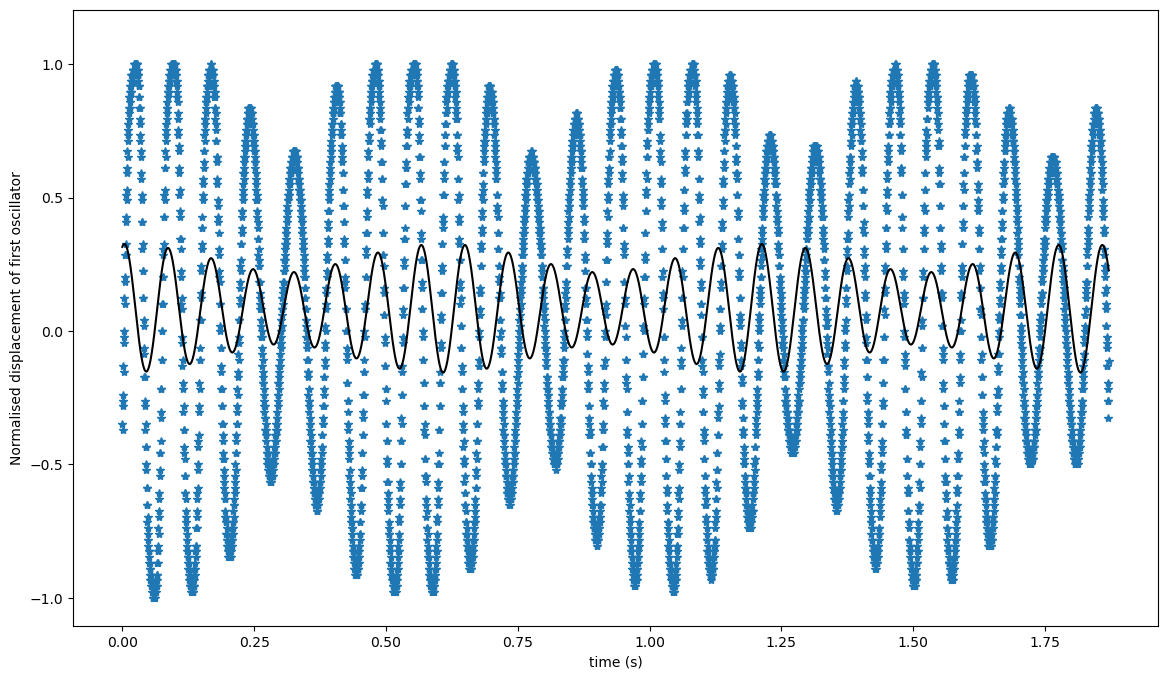

3.990349093330812 -0.4251409419478038


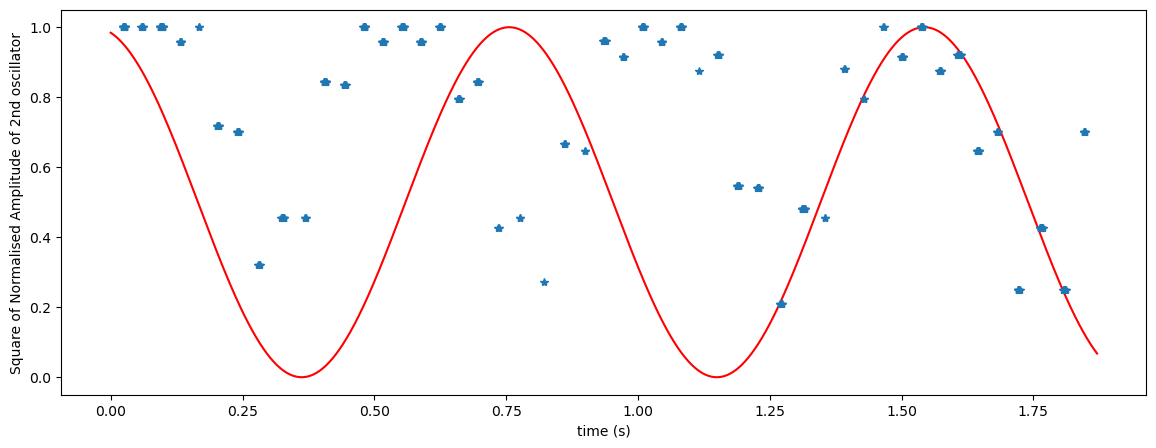

In [8]:
from copy import deepcopy
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd


file = '/home/ws10/maitrey/p442-integrated-lab/IV. Coupled Oscillator/DKMM/ALL0050.CSV'
skip_header = 340
max_rows = None
wave = 2

if max_rows == None:
    data = np.genfromtxt(file, delimiter=',', skip_header = skip_header)
else:
    data = np.genfromtxt(file, delimiter=',', skip_header = skip_header, max_rows=max_rows)

if wave==1:
    x1 = data[ :,0]
    x1 = x1 + x1[0]*np.sign(x1[0])
    y1 = (data[ :,1]).tolist()
    
    for i in range(len(y1)-1):
        if y1[i]>=0:
            y1[i]=(y1[i]/np.max(data[ :,1]))
        else:
            y1[i]=(y1[i]/abs(np.min(data[ :,1])))
#l=np.max(abs(np.max(data[ :,1]),abs(np.min(data[ :,1]))    
else:
    x1 = data[ :,2]
    x1 = x1 + x1[0]*np.sign(x1[0])
    y1 = (data[ :,3]).tolist()
    
    for i in range(len(y1)-1):
        if y1[i]>=0:
            y1[i]=(y1[i]/np.max(data[ :,3]))
        else:
            y1[i]=(y1[i]/abs(np.min(data[ :,3])))
def func(x, w1, w2, A, B, y0, xc):
    return A *np.cos(w1*(x - xc)) + B*np.cos(w2*(x - xc)) + y0
print(y1)
popt, pcov = curve_fit(func, x1, y1, p0=(78, 68, -0.70, -0.34552504757168173, -0.1585394532590704, 0.011490567445622747), bounds=([-np.inf, -np.inf, -np.inf, -np.inf, -np.inf, -np.inf],[np.inf, np.inf, np.inf, np.inf, np.inf,np.inf]))
print(popt)
w1 = popt[0]
w2 = popt[1]
A = popt[2]
B = popt[3]
y0 = popt[4]
xc = popt[5]

# w1 = 106.75726372524723
# w2 = 97.90203960668079
# A = 0.5457510426812962
# B = 0.37429161201505434
# y0 = 0.02870282747823502
# xc = -1.1

Detuning = (w1-w2)*(abs(B)-abs(A))/(abs(B)+abs(A))
Rabi_Freq = (w1-w2)*((1-((abs(B)-abs(A))/(abs(B)+abs(A)))**2)**0.5)
Wg = (w1+w2-((w1-w2)*(abs(B)-abs(A))/(abs(B)+abs(A))))/2


print("Parameter estimation results:")
print("w1 = ",w1," | w2 = ",w2, " | A = ",A," | B = ",B," | y0 =", y0," | xc =", xc)
print("Detuning = ", Detuning, " | Rabi_Freq = ", Rabi_Freq , " | Wg = ", Wg)
print("--------------------------")
print("Covariance matrix of the estimate:")
print(pcov)

curvex=np.linspace(x1[0],x1[-1],len(x1))
curvey=func(curvex,w1,w2,A,B,y0,xc)
plt.figure(figsize=(14,8))    
plt.plot(x1,y1,'*')
plt.plot(curvex,curvey,'black', 1.1)
plt.xlabel('time (s)')
plt.ylabel(f'Normalised displacement of first oscillator')
plt.savefig(f"{file}_{wave}.png",dpi=300)
plt.show()

f = open(f'{file}_{wave}.txt', "w")
f.write("Parameter estimation results:\n")
f.write(f" w1 = {w1} \n w2 = {w2} \n A = {A} \n B = {B} \n C =  {y0} \n D = {xc} \n")
f.write(f"\n Detuning = {Detuning} \n Rabi_Freq = {Rabi_Freq} \n Wg = {Wg} \n")
f.write("\n--------------------------\n")
f.write("Covariance matrix of the estimate:\n")
f.write(f'{pcov}')
f.close()



'''
non_y = []
non_x = []
i = 20
while i < (len(x1)-45):
    cond = True
    for j in range(40):
        if abs(y1[i - j - 1]) > abs(y1[i]) or abs(y1[i]) < abs(y1[i + j + 1]):
            cond = False
        if cond:
            non_y.append(y1[i]**2)
            non_x.append(x1[i])
        i += 1

def func1(x, a, b):
    return (np.sin(a*(x-b)))**2

p1, p2 = curve_fit(func1, non_x, non_y, p0=(5, 0))

print(p1[0], p1[1])

curvex=np.linspace(x1[0],x1[-1],len(x1))
curvey=func1(curvex,p1[0],p1[1])
plt.plot(curvex,curvey,'r')
plt.plot(non_x,non_y,'*')
plt.xlabel('time (s)')
plt.ylabel(f'Square of Normalised Amplitude of wave {wave}')
plt.show()

'''

xa=[]
ya=[]
for i in range(len(y1)-1):
    ya.append(y1[i]**2)
    xa.append(x1[i])



def get_peaks(l):
    
    peaks_x = []
    indices = []
    x_in=[]
    for i in range(1, len(l)-51):
        flag=0
        for j in range(i-50,i+50):
            if (abs(l[i])<abs(l[j]) and j!=i):
                flag=1
        if flag==0:
            peaks_x.append(l[i])
            indices.append(i)
            x_in.append(x1[i])       
    return peaks_x, x_in
o1,o2=get_peaks(ya)


def func1(x, a, b):
    return (np.sin(a*(x-b)))**2

p1, p2 = curve_fit(func1, o2, o1, p0=(5, 0))

print(p1[0], p1[1])

curvex=np.linspace(x1[0],x1[-1],len(x1))
curvey=func1(curvex,p1[0],p1[1])
plt.figure(figsize=(14,5))  
plt.plot(curvex,curvey,'r')
plt.plot(o2,o1,'*')
plt.xlabel('time (s)')
plt.ylabel(f'Square of Normalised Amplitude of 2nd oscillator')
plt.show()

In [ ]:
import math
import numpy as np
from sympy import *

x, y = symbols('x y') 
w1 =  102.03543241850812
w2 =  95.23088023807551
A =  0.4364888465725321
B =  0.6500739975721066
y0 = -0.0407674266803583
xc = 0.017018878276445437

y=A*cos(w1*(x - xc)) + B*cos(w2*(x - xc)) + y0

# set the expression, y, equal to 0 and solve
result = solve(Eq(y, 0))

print(result)

KeyboardInterrupt: 

0.12189663109040269
135.17888215216988


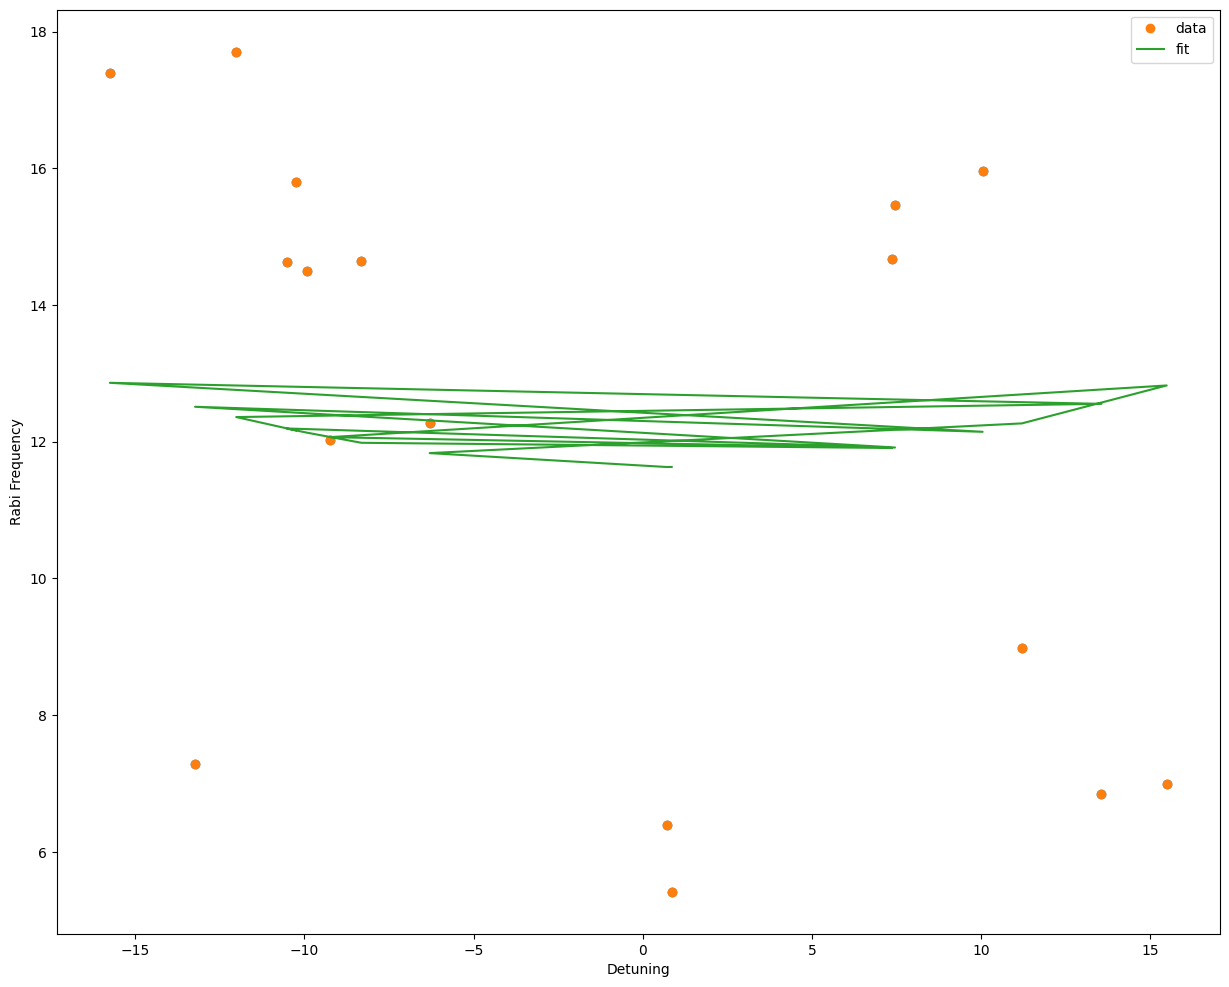

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

xdata = [0.8573569892775015 ,0.7113047071457316, -6.2952142570612875 , 11.207890011220913 , 15.488164087236742 , -9.243763702335109 , 7.36327136469895, -8.31672686442478, -9.924357973288082 ,-10.52285953647, 7.458384371664, -13.230451057636307, 10.04746544267039, -15.74900242200, 13.559911057665255 , -12.013833283286017, -10.242708743832308]
ydata = [5.414918761896197, 6.396138898770744, 12.278454884699071,  8.985776689555276 , 6.99522704170248, 12.020535830632468, 14.67805527917, 14.643685601763766, 14.49109289888067 , 14.63410790, 15.4575017622614, 7.279551579482416,15.9565488195901, 17.396524004554834, 6.84963861745585, 17.70578834045012 , 15.805574944473276]

#Recast xdata and ydata into numpy arrays so we can use their handy features
xdata = np.asarray(xdata)
ydata = np.asarray(ydata)
plt.figure(figsize=(15,12)) 
plt.plot(xdata, ydata, 'o')

# Define the Gaussian function
def Gauss(x, A, B):
    y = np.sqrt(B+(A*x**2))
    return y

parameters, covariance = curve_fit(Gauss, xdata, ydata)

fit_A = parameters[0]
fit_B = parameters[1]
print(fit_A)
print(fit_B)

fit_y = Gauss(xdata, fit_A, fit_B)
plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, fit_y, '-', label='fit')
plt.xlabel('Detuning')
plt.ylabel(f'Rabi Frequency')
plt.legend()

# Rabi frequency plot


33
1.058608853091767 111.22240319716698


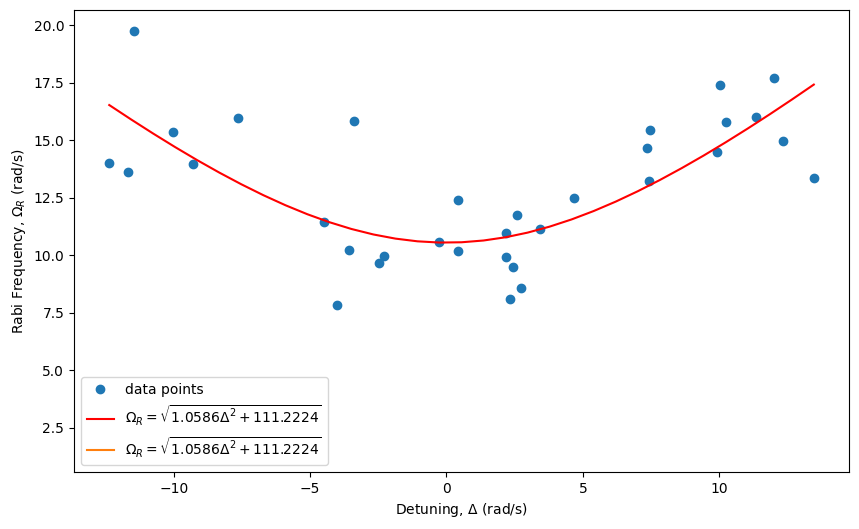

In [ ]:
from copy import deepcopy
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd

def fun(x, A, B):
    y = np.sqrt(B+(A*x**2))
    return y

x1 = [4.6675645719,7.36327136469, -9.314461164656, 9.924357973288, -10.021022454537, 7.4583843716649, -12.3675754369835, -7.644597212820, 10.0474654426703, 12.013833283286, 10.2427087438323, 11.346130636254, -11.474175132125, 7.422532173801725, -11.673014045008, 12.357610533853, 13.4712150242356, -3.3915664569649, 0.43811647068299, 3.41878981602662, -4.5102517447192, -2.28615385372787, 2.5804191248438, 2.17451756722646, -4.020487053414, -2.46297790917752, 2.4421653229673, 2.7259231300644, -3.569758427337, 2.323351464582, -0.291592357670, 2.200717782948, 0.4136533793559]
y1 =[ 12.4762179332, 14.67805527917, 13.962510373303, 14.49109289888, 15.368055511164, 15.4575017622614,14.0280545168954, 15.956548819590, 17.3965240045548, 17.705788340450, 15.805574944473, 16.027347220066, 19.7577945130657, 13.212061271966073, 13.6360406139779, 14.9548723714535, 13.3456696392772, 15.841721327866, 12.396723818617, 11.1596708090894, 11.462899385939, 9.956632753263, 11.7320927897688, 10.949342954763, 7.83788968291273, 9.6549421277004, 9.473622438542579, 8.558377981065, 10.2358996418091, 8.0811256347829, 10.5584625918867, 9.9010297751910, 10.190606802259 ]
popt, pcov = curve_fit(fun, x1, y1, p0=(1.87320709832711,2.06664049253594), bounds=([-np.inf, -np.inf],[np.inf, np.inf]))

A = popt[0]
B = popt[1]
print(A,B)
curvex=np.linspace(min(x1),max(x1),len(x1))
curvey=fun(curvex,A,B)
plt.figure(figsize=(10,6))    
line = plt.plot(x1,y1,'o', label = 'data points')
plt.legend()
plt.plot(curvex,curvey,'red', 1.5, label='$\Omega_R = \sqrt{1.0586\Delta^2 + 111.2224}$')
plt.xlabel('Detuning, $\Delta$ (rad/s)')
plt.ylabel(f'Rabi Frequency, $\Omega_R$ (rad/s)')
plt.legend()
plt.show()


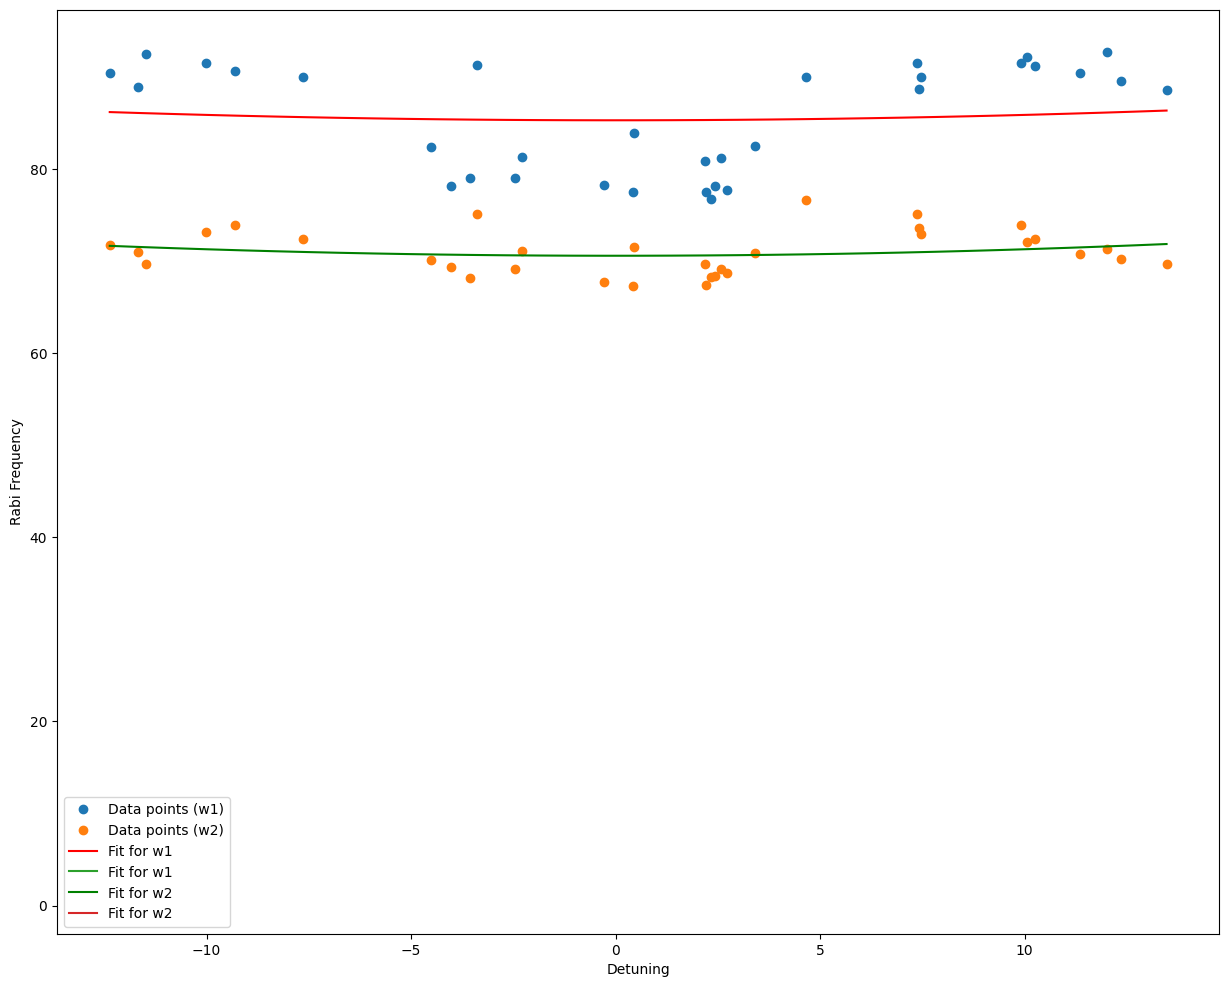

In [ ]:
from copy import deepcopy
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd

def fun(x, B):
    y = np.sqrt(x**2+B**2)
    return y

def fun2(x, C):
    y = np.sqrt(x**2+C**2)
    return y

Det=[4.6675645719,7.36327136469, -9.314461164656, 9.924357973288, -10.021022454537, 7.4583843716649, -12.3675754369835, -7.644597212820, 10.0474654426703, 12.013833283286, 10.2427087438323, 11.346130636254, -11.474175132125, 7.422532173801725, -11.673014045008, 12.357610533853, 13.4712150242356, -3.3915664569649, 0.43811647068299, 3.41878981602662, -4.5102517447192, -2.28615385372787, 2.5804191248438, 2.17451756722646, -4.020487053414, -2.46297790917752, 2.4421653229673, 2.7259231300644, -3.569758427337, 2.323351464582, -0.291592357670, 2.200717782948, 0.4136533793559]
w1 = [90.00802697777773, 91.5412541941715, 90.69917703507103,91.54340992072129, 91.53252650502554, 90.07740740632896, 90.47133020390504, 90.06467655696268, 92.21933848299058, 92.77109758012837, 91.22616584685092, 90.45835018735775, 92.55588295831159, 88.77340301317868, 88.95078020028892, 89.64070174656625, 88.66426662769159, 91.28765868029184, 83.96291318892003, 82.57475870551154, 82.4197273403116, 81.31013823283327, 81.21984650652881, 80.86032112907077, 78.14146840052081, 79.08901192706503, 78.20819253907808, 77.75733315843623, 79.01240001826343, 76.74081315122858, 78.30853161650184, 77.5475691762324, 77.48423638250803 ]
w2 = [76.68728477052497, 75.11983306295414, 73.91493196081991,73.97967869452802, 73.18591861068793, 72.9146029103903, 71.7699068431426, 72.37142030554811, 72.12977379724619, 71.37420222319842, 72.39190765237083, 70.821381497473, 69.70796972792608, 73.61911164322979, 71.00082586828528, 70.24073407255038, 69.70165783169728, 75.08695321226352, 71.55844998098726, 70.90315314443252, 70.10143065883305, 71.09441333313723, 69.20732953099004, 69.69713888603617, 69.33256206498841, 69.12486782582172, 68.42485499135125, 68.77532388557253, 68.17188265483749, 68.33233210212552, 67.74604334870604, 67.40490929977967, 67.28523760240711 ]

popt, pcov = curve_fit(fun, Det, w1, p0=(1.87320709832711), bounds=([-np.inf],[np.inf]))
popt2, pcov2 = curve_fit(fun2, Det, w2, p0=(1.87320709832711), bounds=([-np.inf],[np.inf]))

B = popt[0]
C = popt2[0]

curvex=np.linspace(min(Det),max(Det),len(Det))
curvey=fun(curvex,B)
curvex2=np.linspace(min(Det),max(Det),len(Det))
curvey2=fun(curvex,C)
plt.figure(figsize=(15,12))    
plt.plot(Det,w1,'o', label = 'Data points (w1)')
plt.plot(Det,w2,'o', label ='Data points (w2)')
plt.plot(curvex,curvey,'red', 1.5, label = 'Fit for w1')
plt.plot(curvex2,curvey2,'green', 1.5, label = 'Fit for w2')
plt.xlabel('Detuning')
plt.ylabel(f'Normal Mode frequency(Rad/s)')
plt.legend()
plt.show()




In [ ]:
Det = [4.6675645719,7.36327136469, -9.314461164656, 9.924357973288, -10.021022454537, 7.4583843716649, -12.3675754369835, -7.644597212820, 10.0474654426703, 12.013833283286, 10.2427087438323, 11.346130636254, -11.474175132125, 7.422532173801725, -11.673014045008, 12.357610533853, 13.4712150242356, -3.3915664569649, 0.43811647068299, 3.41878981602662, -4.5102517447192, -2.28615385372787, 2.5804191248438, 2.17451756722646, -4.020487053414, -2.46297790917752, 2.4421653229673, 2.7259231300644, -3.569758427337, 2.323351464582, -0.291592357670, 2.200717782948, 0.4136533793559]
Rabi =[ 12.4762179332, 14.67805527917, 13.962510373303, 14.49109289888, 15.368055511164, 15.4575017622614,14.0280545168954, 15.956548819590, 17.3965240045548, 17.705788340450, 15.805574944473, 16.027347220066, 19.7577945130657, 13.212061271966073, 13.6360406139779, 14.9548723714535, 13.3456696392772, 15.841721327866, 12.396723818617, 11.1596708090894, 11.462899385939, 9.956632753263, 11.7320927897688, 10.949342954763, 7.83788968291273, 9.6549421277004, 9.473622438542579, 8.558377981065, 10.2358996418091, 8.0811256347829, 10.5584625918867, 9.9010297751910, 10.190606802259 ]
geo_phase =[]

for i in range(len(Det)):
    phi_g = 3.14*(1-(Det[i])/(np.sqrt((Det[i])**2+Rabi[i]**2)))
    geo_phase.append(phi_g)

print(geo_phase)


[2.039749538889016, 1.732041949329878, 4.882551299009027, 1.3657480694277575, 4.855086008730721, 1.7754603682300434, 5.216536428430717, 4.496677081209172, 1.5695806313627023, 1.3769668178378733, 1.4323614445797583, 1.3257255689270369, 4.7169015555853155, 1.602036234042924, 5.181969769024709, 1.1398473333401071, 0.9093145689407732, 3.7973490701307377, 3.0290975211998807, 2.220246503692573, 4.2896873995341585, 3.842693462401213, 2.4654938937019737, 2.5283477835944392, 4.573132430617137, 3.916158047920289, 2.3561776002608545, 2.187050791378904, 4.17399506555434, 2.2723850816591993, 3.2266841202442236, 2.458694117457328, 3.0126471451578434]


3.1440881564849277 -13.926249744581291 2095.1807773554315 41.647051803350536


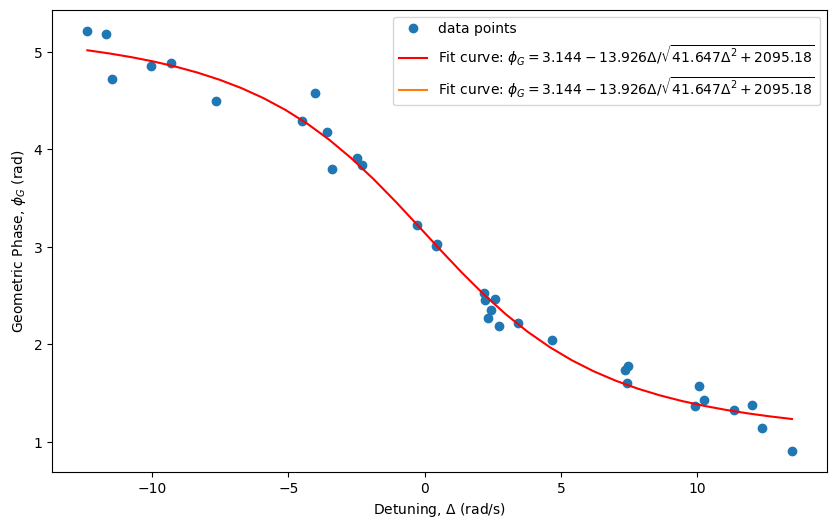

In [ ]:

from copy import deepcopy
from fractions import Fraction
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd

def fun(x, A, B, C, D):
    y = A+(B*x)/(np.sqrt(C+(D*x**2)))
    return y

popt, pcov = curve_fit(fun, Det, geo_phase, p0=(1.87320709832711,2.06664049253594,2.3,1))

A = popt[0]
B = popt[1]
C = popt[2]
D = popt[3]
print(A,B,C,D)
curvex=np.linspace(min(Det),max(Det),len(Det))
curvey=fun(curvex,A,B,C,D)
plt.figure(figsize=(10,6))    
plt.plot(Det,geo_phase,'o', label = 'data points')
plt.plot(curvex,curvey,'red', 1.5, label='Fit curve: $\phi_G = 3.144-13.926\Delta/\sqrt{41.647\Delta^2 + 2095.18}$')
plt.xlabel('Detuning, $\Delta$ (rad/s)')
plt.ylabel(f'Geometric Phase, $\phi_G$ (rad)')
plt.legend()
plt.show()
